# ***Multilinear Regression Assignment - Bike Sharing User Count Prediction*** - *By Devendra Kumar*

In [1]:
# Loading the important libraries 
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

## 1. **Data Understanding, Preparation & EDA**

### 1.1 **Data Understanding**

Note - Please change the input file path according to your system before loading the file in df1.

In [2]:
# Loading the important libraries 
df1 = pd.read_csv('day.csv')
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df1.shape

(730, 16)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### 1.2 **Data Preparation**
- **Handling Catagorical Variables**
    - *Converting season to their respective values as per given in data dictonary.*
    - *Converting weatherst values to their respective catagorial values.*
    - *Converting values of weekday column to their respective week names.*
    - *Converting values of month column to their respective month names.*
- **Removing the unnesscary columns from df1.**
- **Introducing new columns using Feature engineering.**

In [5]:
# Converting season to their respective values as per given in data dictonary.
# As per data dictonary :- (1:spring, 2:summer, 3:fall, 4:winter)

df1.season = df1.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [6]:
# Converting weatherst values to their respective catagorial values.
# As per data dictornary :- 
# weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy --> Clear + Partly Cloudy 
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist --> Mist + Cloudy
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds --> Light Rain + Light Snow + Thunderstrom
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog --> Heavy Rain + Thunderstrom

# Note:- Here I am giving the small descriptive alias to all catagory of weathersit as the existing ones are long.

df1.weathersit = df1.weathersit.map({1: 'Clear + Partly Cloudy ',
                   2: 'Mist + Cloudy',
                   3: 'Light Rain + Light Snow + Thunderstrom',
                   4: 'Heavy Rain + Thunderstrom' })

In [7]:
# Converting values of weekday column to their respective week names.

df1.weekday = df1.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [8]:
# Converting values of month column to their respective month names.

df1.mnth = df1.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})

In [9]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


*As we know, out target column `cnt` is the summation of two columns i.e `casual` and `registered` columns. Here we have two approaches to build the model <br>
**Approach 1:** Dealing directly with the target column `cnt` as it is the sum of both `casual` and `registered` and remove these columns from analysis.<br>
**Approach 2:** Dealing with both `casual` and `registered` as target column and creating two separate models for both and summing the result of both to calculate the final prediction of users i.e `cnt`.<br>*

***So, here we will go with the `Approach 1` at it as it sounds much easy to deal with only one target column.***

In [10]:
# Removing the unnesscary columns from df1.
# Here we dont need instant and dteday column as instant column is just row number and dteday we dont need becasue it is not important for
# Linear Regression. dteday is mainly makes sense in Forcasting/Projection 
# Also here we dont need casual and registered column as they are not helping in analysis and is sum of target column.

df1.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


*Creating the `lag_cnt` column. This column holds the lag value of `cnt` i.e previous day value of `cnt`. As we have timeserise data so by introducing this variable will help to predict the user counts of next day. Ultimatly it is easy to predict the coming 2-3 days of counts on the basis of previous days count.*

In [11]:
# Calculating the lag_cnt variable as lag value of cnt.

df1['lag_cnt'] = np.roll(df1['cnt'], 1)
df1['lag_cnt'].replace(2729,0,inplace=True)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,lag_cnt
0,spring,0,jan,0,sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,985
2,spring,0,jan,0,mon,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349,801
3,spring,0,jan,0,tue,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562,1349
4,spring,0,jan,0,wed,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600,1562


In [12]:
# Checking the shape of dataframe
df1.shape

(730, 13)

In [13]:
# Checking the stats matrix of continous variables.
df1.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,lag_cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,4504.268493
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,1942.076837
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,8714.000000


### 1.3. **EDA or Data Visualization**

In [14]:
# Importing viz libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid",font_scale=1.5)

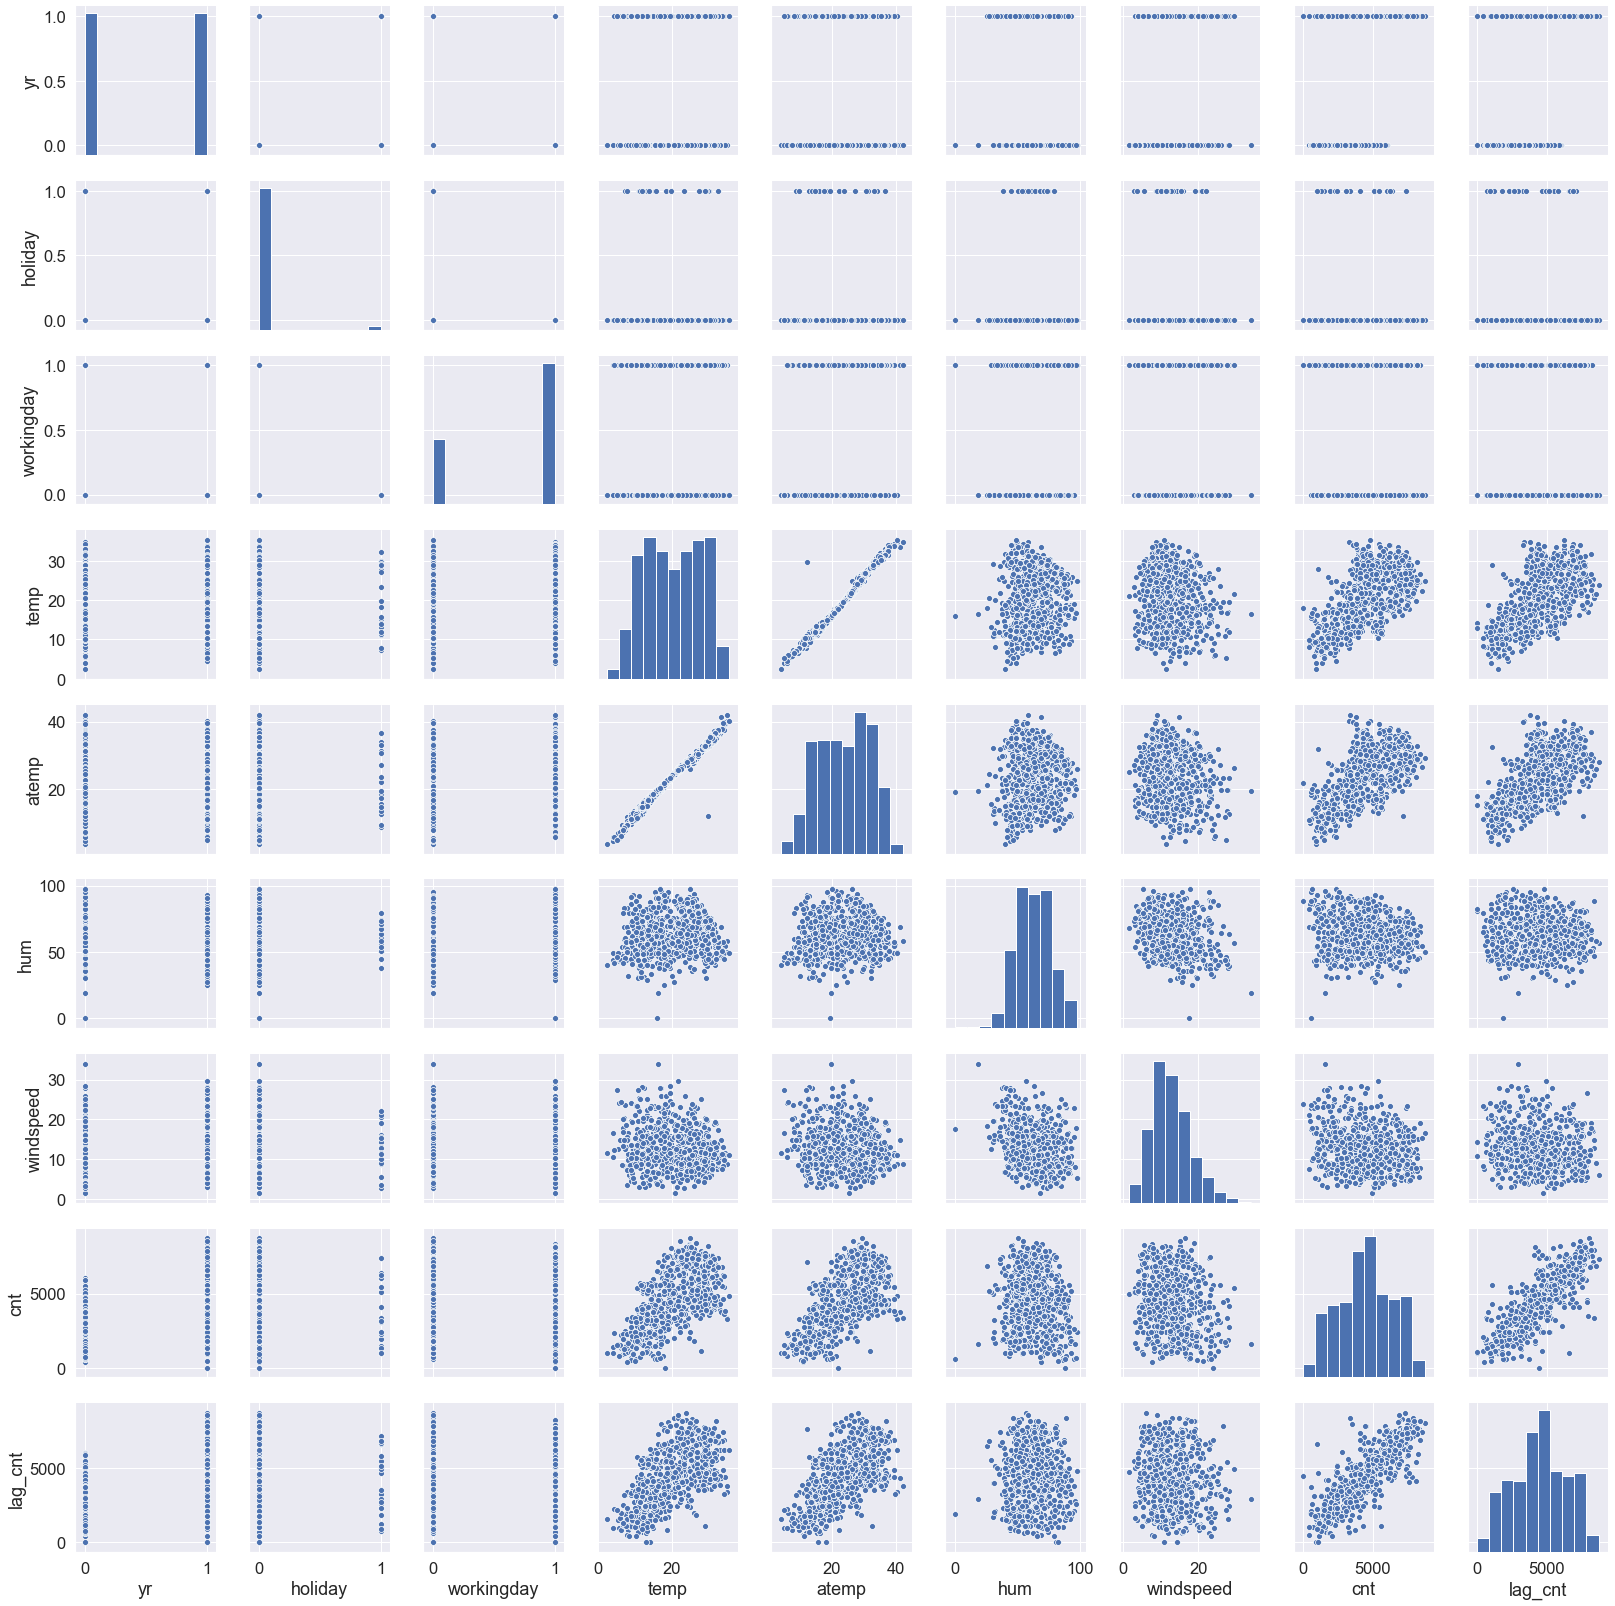

In [15]:
# Creating the pairplot to check the linear relationship between variables
sns.pairplot(df1)
plt.show()

*Obesrevations -*
 - *`cnt vs registered` follows high linear patter.*
 - *`cnt vs casual` follows bit less linear pattern than `registered`. Data is scattered more at high casual values, yet we can consider it as hightly linear pattern.*
 - *`cnt vs temp` and `cnt vs atemp` follows some linear pattern.*
 - *`windspeed` is not following any linear patter against the target variable `cnt`*
 - *Apart from these there are some pridictor variables which are following linear pattern like `temp and atemp`. These types of variables can leads to multicolinearity.*

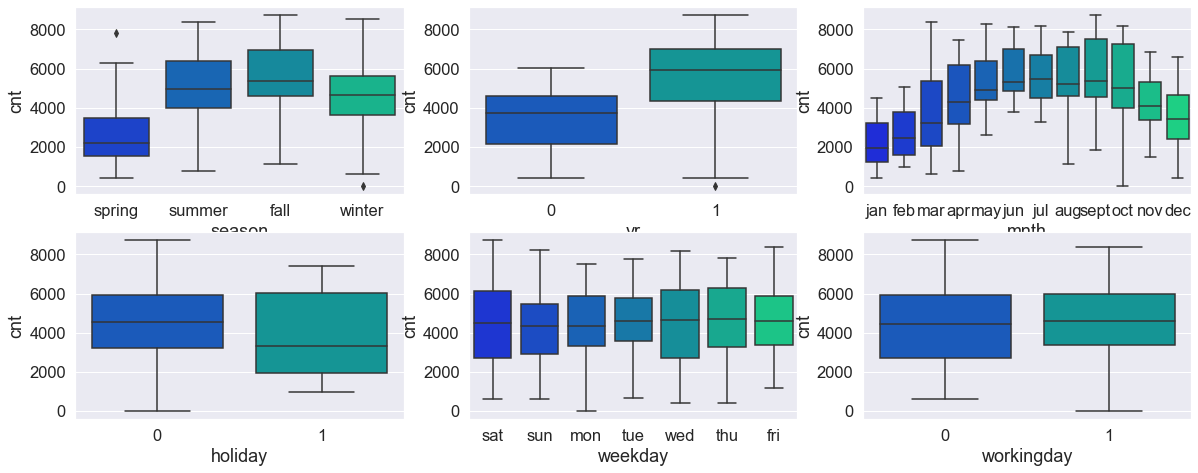

In [16]:
# Vizualizing catagorical variables

plt.figure(figsize=(20, 20))

plt.subplot(5,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df1, palette='winter')
plt.subplot(5,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df1, palette='winter')
plt.subplot(5,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df1, palette='winter')

plt.subplot(5,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df1, palette='winter')
plt.subplot(5,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1, palette='winter')
plt.subplot(5,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df1, palette='winter')
plt.show()

*Obesrvations-*
- *There are some outliers in `season`.*
- *The `mean or average or median` value is same for both values of `workingday`.*
- *The mean or median is same of all values of weekday.*
- *We have larger values of user counts when there is not a holiday.*
- *We have largest values of user counts on `saturday and friday` as compared to all other week days.*

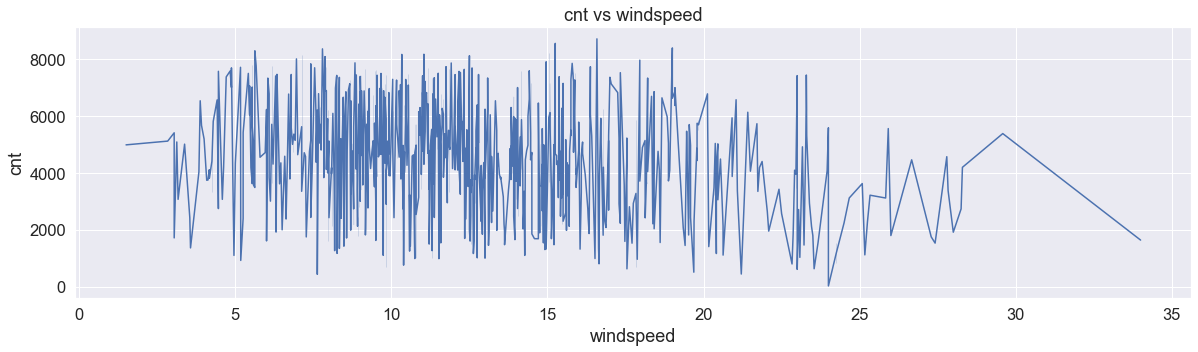

In [17]:
# Observing impact of windspeed on target variable cnt.

plt.figure(figsize=(20, 5))
sns.lineplot('windspeed','cnt',data=df1)
plt.title('cnt vs windspeed')
plt.show()

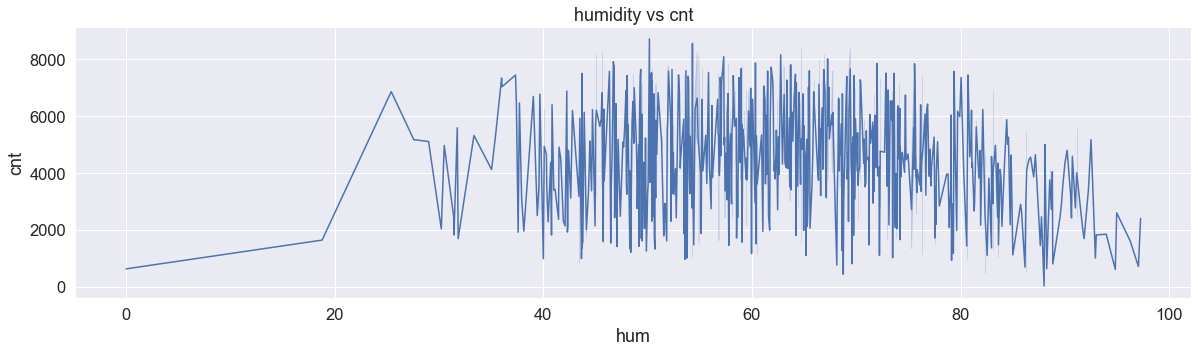

In [18]:
# Observing impact of hum on target variable cnt.

plt.figure(figsize=(20, 5))
sns.lineplot('hum','cnt',data=df1)
plt.title('humidity vs cnt')
plt.show()

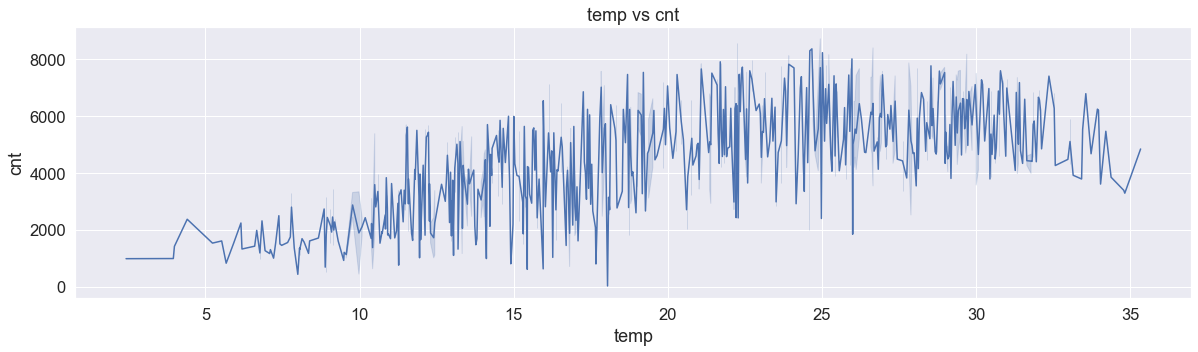

In [19]:
# Observing impact of temprature over user count.
plt.figure(figsize=(20, 5))
sns.lineplot('temp','cnt',data=df1)
plt.title('temp vs cnt')
plt.show()

### 1.4. **Dummy Variables**

In [20]:
seasons = pd.get_dummies(df1['season'], drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
months = pd.get_dummies(df1['mnth'], drop_first=True)
months.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [22]:
weekdays = pd.get_dummies(df1['weekday'], drop_first=True)
weekdays.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [23]:
weather = pd.get_dummies(df1['weathersit'], drop_first=True)
weather.head()

,Light Rain + Light Snow + Thunderstrom,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [24]:
df2 = pd.concat([df1, seasons, months, weekdays, weather], axis=1)
df2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sept,mon,sat,sun,thu,tue,wed,Light Rain + Light Snow + Thunderstrom,Mist + Cloudy
0,spring,0,jan,0,sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df2.drop(['season','mnth','weekday', 'weathersit'], axis=1,inplace=True)
df2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,lag_cnt,spring,...,oct,sept,mon,sat,sun,thu,tue,wed,Light Rain + Light Snow + Thunderstrom,Mist + Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,985,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,801,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1349,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1562,1,...,0,0,0,0,0,0,0,1,0,0


## 2. **Model Building**
- *Splitting the data into training and testing sets*
- *Scaling the data.*
- *Building the Linear Regression Model.*
- *Variable selection and Tuning the model*
- *Residuals analysis.*
- *Ploting error terms.*

### 2.1. **Splitting the Data into Training and Testing Sets**

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
df_train.shape

(510, 31)

In [28]:
df_test.shape

(219, 31)

### 2.2. **Rescaling**

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,lag_cnt,spring,...,oct,sept,mon,sat,sun,thu,tue,wed,Light Rain + Light Snow + Thunderstrom,Mist + Cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,5875,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,7105,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,3194,1,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1341,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,6233,0,...,0,0,0,1,0,0,0,0,0,1


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt','lag_cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,lag_cnt,spring,...,oct,sept,mon,sat,sun,thu,tue,wed,Light Rain + Light Snow + Thunderstrom,Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0.674202,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.815355,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.366537,1,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0.153890,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.715286,0,...,0,0,0,1,0,0,0,0,0,1


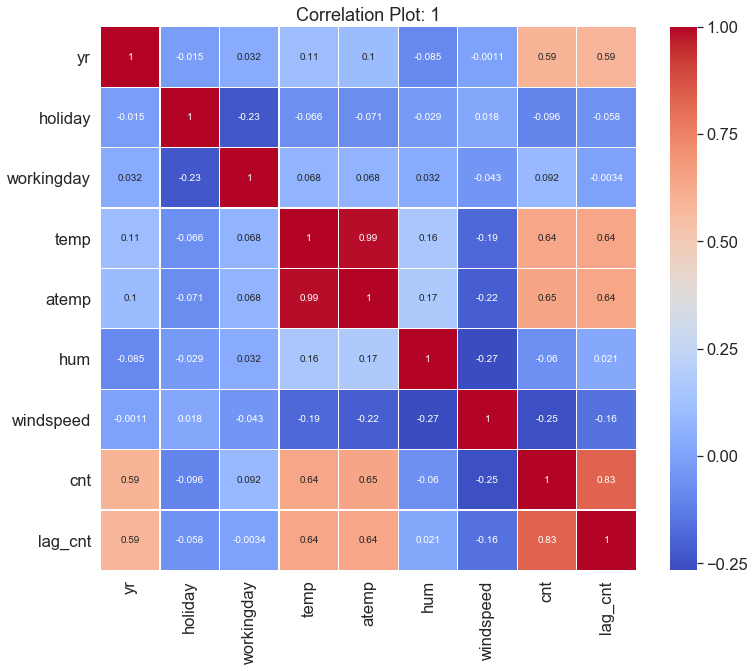

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (12, 10))
corr1_train = df_train[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt','lag_cnt']].corr()
sns.heatmap(corr1_train,annot=True,cmap="coolwarm",linewidth=0.30)
plt.title('Correlation Plot: 1')
plt.show()

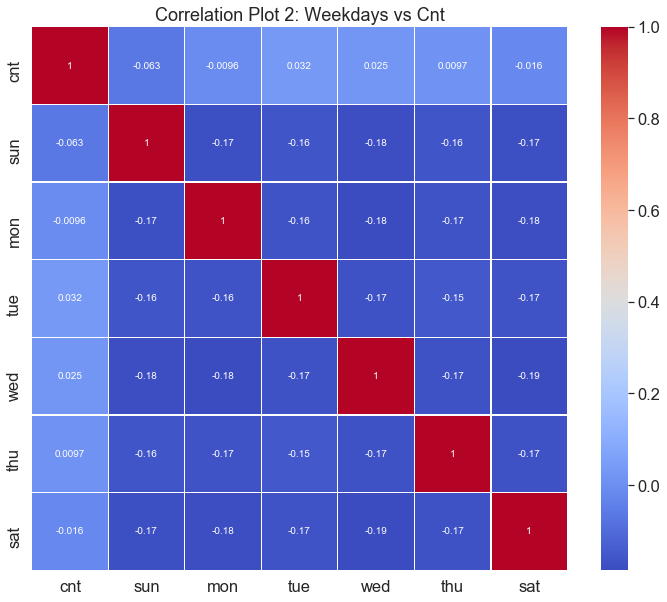

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (12, 10))
corr2_train = df_train[['cnt','sun','mon','tue','wed','thu','sat']].corr()
sns.heatmap(corr2_train,annot=True,cmap="coolwarm",linewidth=0.30)
plt.title('Correlation Plot 2: Weekdays vs Cnt')
plt.show()

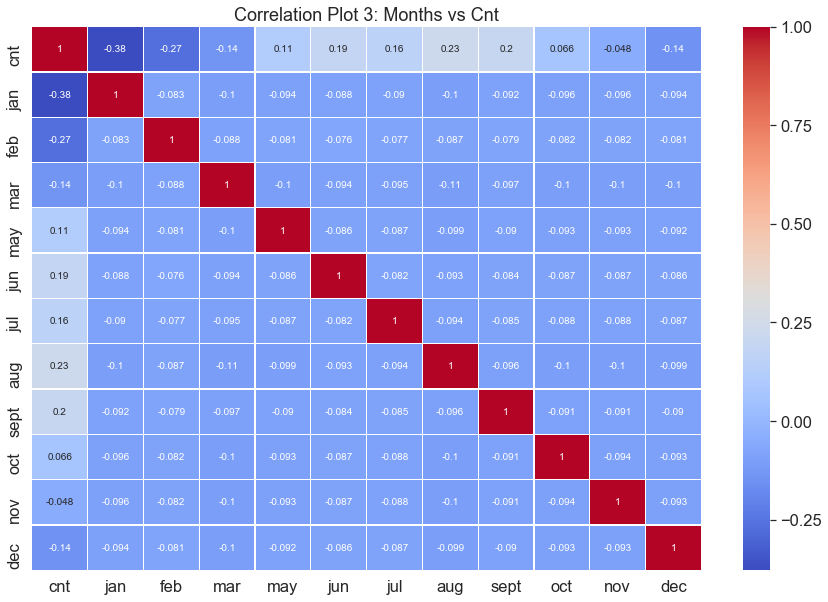

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (15, 10))
corr3_train = df_train[['cnt','jan','feb','mar','may','jun','jul','aug','sept','oct','nov','dec']].corr()
sns.heatmap(corr3_train,annot=True,cmap="coolwarm",linewidth=0.30)
plt.title('Correlation Plot 3: Months vs Cnt')
plt.show()

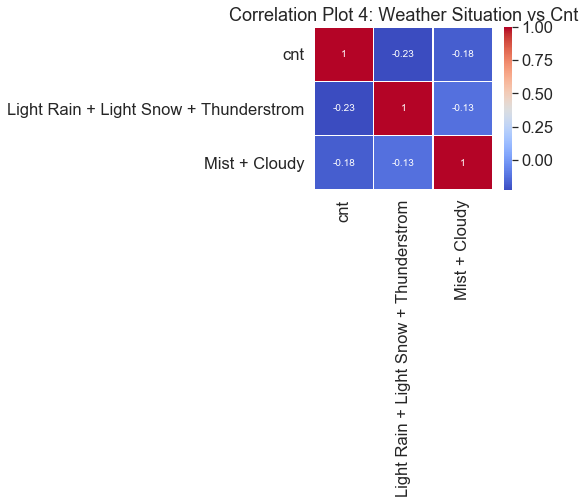

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (4, 3))
corr4_train = df_train[['cnt','Light Rain + Light Snow + Thunderstrom','Mist + Cloudy']].corr()
sns.heatmap(corr4_train,annot=True,cmap="coolwarm",linewidth=0.30)
plt.title('Correlation Plot 4: Weather Situation vs Cnt')
plt.show()

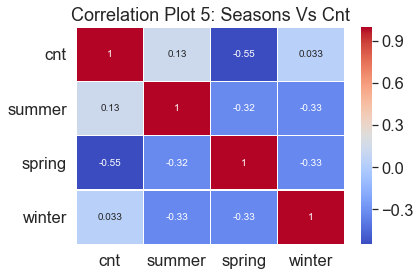

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (6, 4))
corr5_train = df_train[['cnt','summer','spring','winter']].corr()
sns.heatmap(corr5_train,annot=True,cmap="coolwarm",linewidth=0.30)
plt.title('Correlation Plot 5: Seasons Vs Cnt')
plt.show()

***Obesrvations:-***
1. *At correlation plot 1 we see `workingday','lag_cnt','temp','windspeed'` has the good correlation with the target variable `cnt`.*
    - *`yr` has +ve good correlation of `0.59`.*
    - *`holiday` and `workingdays` has weak correlation of `-0.096` and `0.092` respectively.*
    - *`temp` and `atemp` as good +ve correlation of `~0.65`. Also there is `multicolinearity` between them, hence has to drop one of them.*
    - *`hum` and `windspeed` has -ve weak correlation of `-0.06` and `-0.25` respectively. But from buisness point of view we should consider these features as these features can impact the user count of bike sharing.*
    - *`lag_cnt` is the only one feature that is having very strong +ve correlation of `0.85`.*
2. *At correlation plot 2 we see `sat, wed, tue` has good +ve correlation and on `sun` we have strong -ve correlation.*
3. *At correlation plot 3 we see in month of `aug, sept, oct` we have the good +ve correlation.*
4. *At correlation plot 4 we see the weather situation correlation is so weak (maybe because of less data)with target variable `cnt` but as buisness point of view we should take these as feature to pridict in our model.*
5. *At correlation plot 5 we see the seasons type correlation with the target variable `cnt`.*
    - *`spring` has -ve good correlation of `-0.55`.*
    - *`winter` and `summer` has +ve week correlation of `0.033` and `0.13` respectivly.*

### 2.3. **Building Linear Model**

In [39]:
# Dividing into X_train and y_train sets
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [41]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,lag_cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,Light Rain + Light Snow + Thunderstrom,Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.674202,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.815355,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.366537,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.153890,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.715286,0,1,...,0,0,0,1,0,0,0,0,0,1


In [42]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'lag_cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun',
       'thu', 'tue', 'wed', 'Light Rain + Light Snow + Thunderstrom',
       'Mist + Cloudy'],
      dtype='object')

### **Feature Selection Using RFE**

In [43]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 12)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model

model.fit(X_rfe,y_train)
# print(X_train.columns)
# print(rfe.support_)
# print(rfe.ranking_)

rfe_features = pd.DataFrame()
rfe_features['X_train'] = X_train.columns
rfe_features['support_'] = rfe.support_
rfe_features['ranking_'] = rfe.ranking_
rfe_features = rfe_features.sort_values(by='ranking_').set_index(np.arange(len(X_train.columns)))
rfe_features['ranking_']= rfe_features['ranking_'].astype(int)
rfe_features[rfe_features['ranking_']<=2]

,X_train,support_,ranking_
0,yr,True,1
1,sat,True,1
2,sept,True,1
3,Light Rain + Light Snow + Thunderstrom,True,1
4,winter,True,1
5,summer,True,1
6,lag_cnt,True,1
7,Mist + Cloudy,True,1
8,hum,True,1
9,workingday,True,1


### **Feature Selection using Backward Elimination**

In [44]:
import statsmodels.api as sm
#Backward Elimination
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['yr', 'workingday', 'temp', 'hum', 'windspeed', 'lag_cnt', 'summer', 'winter', 'sept', 'sat', 'Light Rain + Light Snow + Thunderstrom', 'Mist + Cloudy']


***From above both Feature Selection methods i.e RFE and Backward Elimination, we are sure that we have total of 12 significant features to choose for our best fit model.***

<br>


### **LM1 With All Possible Features**
*Here in starting, we will take all possible features described by the Feature Selection methods and will compare their $ p-value $ and $ VIF $.*

In [45]:
import statsmodels.api as sm

features = ['yr', 'workingday', 'temp', 'windspeed', 'lag_cnt', 'hum', 'summer', 'winter', 'sept', 'sat',
            'Light Rain + Light Snow + Thunderstrom','Mist + Cloudy']
# Add a constant
X_train_lm1 = sm.add_constant(X_train[features])

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     254.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.96e-203
Time:                        23:13:16   Log-Likelihood:                 540.15
No. Observations:                 510   AIC:                            -1054.
Df Residuals:                     497   BIC:                            -999.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1285      0.027      4.694      0.000       0.075       0.182
yr                                         0.1650      0.011     14.982      0.000       0.143       0.187
workingday                                 0.0586      0.010      5.662      0.000       0.038       0.079
temp                                       0.3991      0.028     14.089      0.000       0.343       0.455
windspeed                                 -0.1665      0.024     -6.869      0.000      -0.214      -0.119
lag_cnt                                    0.2787      0.034      8.111      0.000       0.211       0.346
hum                                       -0.1150      0.036     -3.212      0.001      -0.185      -0.045
summer                                     0.0676      0.010      6.804      0.000       0.048       0.087
winter                                     0.1009      0.011      9.255      0.000       0.080       0.122
sept                                       0.0818      0.015      5.523      0.000       0.053       0.111
sat                                        0.0586      0.013      4.395      0.000       0.032       0.085
Light Rain + Light Snow + Thunderstrom    -0.2463      0.025     -9.930      0.000      -0.295      -0.198
Mist + Cloudy                             -0.0564      0.010     -5.692      0.000      -0.076      -0.037
==============================================================================
Omnibus:                       59.577   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.363
Skew:                          -0.553   Prob(JB):                     3.73e-38
Kurtosis:                       5.625   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Calculating VIF of LM1**

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_vif = X_train_lm1.drop('const',axis=1)
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index(np.arange(len(vif)))

,Features,VIF
0,lag_cnt,25.67
1,temp,19.23
2,hum,15.99
3,workingday,4.53
4,yr,4.35
5,windspeed,3.73
6,Mist + Cloudy,2.10
7,winter,2.09
8,sat,1.80
9,summer,1.70


***Observations -*** *Here we observe that the feature's is highly significant as their p-values = 0. But the VIF values of some features are extermily high (>5). So will drop those features and build a new model.*

### **LM2 After Dropping `lag_cnt` (having VIF = 25.67)**

In [48]:
import statsmodels.api as sm

features = ['yr', 'workingday', 'temp', 'windspeed', 'hum', 'summer', 'winter', 'sept', 'sat',
            'Light Rain + Light Snow + Thunderstrom','Mist + Cloudy']
# Add a constant
X_train_lm2 = sm.add_constant(X_train[features])

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.89e-191
Time:                        23:13:16   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1698      0.029      5.937      0.000       0.114       0.226
yr                                         0.2294      0.008     28.272      0.000       0.213       0.245
workingday                                 0.0536      0.011      4.875      0.000       0.032       0.075
temp                                       0.5709      0.020     28.559      0.000       0.532       0.610
windspeed                                 -0.1861      0.026     -7.259      0.000      -0.236      -0.136
hum                                       -0.1613      0.038     -4.295      0.000      -0.235      -0.087
summer                                     0.0899      0.010      8.859      0.000       0.070       0.110
winter                                     0.1407      0.010     13.575      0.000       0.120       0.161
sept                                       0.1025      0.016      6.610      0.000       0.072       0.133
sat                                        0.0630      0.014      4.450      0.000       0.035       0.091
Light Rain + Light Snow + Thunderstrom    -0.2439      0.026     -9.250      0.000      -0.296      -0.192
Mist + Cloudy                             -0.0553      0.011     -5.255      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       72.653   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.950
Skew:                          -0.754   Prob(JB):                     3.39e-37
Kurtosis:                       5.372   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Calculating VIF of LM2**

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_vif = X_train_lm2.drop('const',axis=1)
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index(np.arange(len(vif)))

,Features,VIF
0,hum,15.98
1,temp,8.12
2,workingday,4.53
3,windspeed,3.73
4,Mist + Cloudy,2.10
5,yr,2.02
6,sat,1.79
7,winter,1.66
8,summer,1.58
9,sept,1.20


***Observation :-*** *Here we see in lm2 that after dropping `lag_cnt`, the R-Squared has been dropped to `0.84` and the VIF has been descreaed of few feature but still we have `hum` and `temp` with >5 VIF values. So now will build lm3 with dropping `hum`.*

### **LM3 After Dropping `hum` (having VIF = 15.98)**

In [50]:
import statsmodels.api as sm

features = ['yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'sept', 'sat',
            'Light Rain + Light Snow + Thunderstrom','Mist + Cloudy']
# Add a constant
X_train_lm3 = sm.add_constant(X_train[features])

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        23:13:16   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0753      0.019      4.051      0.000       0.039       0.112
yr                                         0.2331      0.008     28.382      0.000       0.217       0.249
workingday                                 0.0563      0.011      5.048      0.000       0.034       0.078
temp                                       0.5499      0.020     27.885      0.000       0.511       0.589
windspeed                                 -0.1552      0.025     -6.201      0.000      -0.204      -0.106
summer                                     0.0874      0.010      8.481      0.000       0.067       0.108
winter                                     0.1318      0.010     12.760      0.000       0.112       0.152
sept                                       0.0972      0.016      6.181      0.000       0.066       0.128
sat                                        0.0677      0.014      4.710      0.000       0.039       0.096
Light Rain + Light Snow + Thunderstrom    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
Mist + Cloudy                             -0.0813      0.009     -9.292      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Calculating VIF of LM3**

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_vif = X_train_lm3.drop('const',axis=1)
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index(np.arange(len(vif)))

,Features,VIF
0,temp,4.76
1,workingday,4.04
2,windspeed,3.43
3,yr,2.02
4,sat,1.69
5,summer,1.57
6,Mist + Cloudy,1.53
7,winter,1.40
8,sept,1.20
9,Light Rain + Light Snow + Thunderstrom,1.08


***Observation :-*** *Here in lm3 we notice that tha R-Squared has been dropped further to `0.83` and now all the features are statistcly significat as their p-values are 0 and VIF is lower than 5. Hence, we are good with our mode.*

***So we have finalized our Linear Model # 3 with having Adj R-Square = 0.832 with all significant features.***

### **Residuals Analysis**

In [52]:
# Calculating y_train_pred

y_train_pred = lr3.predict(X_train_lm3)

In [53]:
# Error value evalution

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('MSE : {}'.format(mean_squared_error(y_train, y_train_pred)))
print('MAE : {}'.format( mean_absolute_error(y_train, y_train_pred)))

RMSE: 0.09092560995752333
MSE : 0.008267466546147666
MAE : 0.0673369086873516


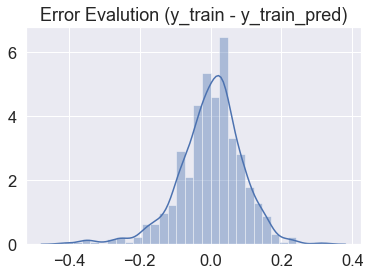

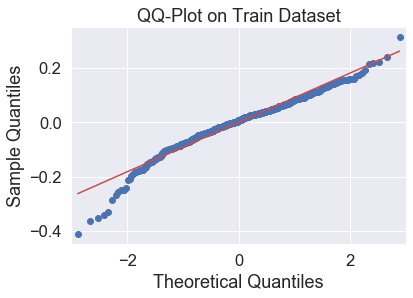

The mean of the residuals is 3.268e-16


In [54]:
# Plotting the distplot for errors
sns.distplot(y_train - y_train_pred)
plt.title('Error Evalution (y_train - y_train_pred)')
plt.show()

sm.qqplot(y_train - y_train_pred, line='s')
plt.title('QQ-Plot on Train Dataset')
plt.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(y_train - y_train_pred)/ len(y_train - y_train_pred)
print("The mean of the residuals is {:.4}".format(mean_residuals))

***Observations :-*** *As we see, our errors terms are normaly distributed from distplot and QQ-Plot. So we are good here.*


### **Checking Auto Correlation**
*We will go to our favorite module the statsmodels.stats.diagnostic module, and use the Ljung-Box test for no autocorrelation of residuals. Here:*

**H0: The data are random.**<br>
**Ha: The data are not random.**<br><br>
*That means we want to fail to reject the null hypothesis, have a large p-value because then it means we have no autocorrelation. To use the Ljung-Box test, we will call the acorr_ljungbox function, pass through the est.resid and then define the lags.*<br><br>

*The lags can either be calculated by the function itself, or we can calculate them. If the function handles it the max lag will be $ min((num_obs // 2 - 2), 40) $, however, there is a rule of thumb that for non-seasonal time series the lag is $ min(10, (num_obs // 5)) $.*<br>

*We also can visually check for autocorrelation by using the statsmodels.graphics module to plot a graph of the autocorrelation factor.*

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.3325
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


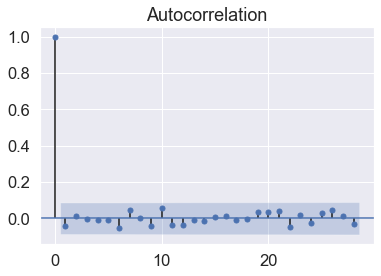

In [55]:
# test for autocorrelation
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X_train_lm3)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(y_train - y_train_pred, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(y_train - y_train_pred)
plt.show()

**Observation :-** *Here we can see there is no auto-correlation in between features as we failed to reject the $H0$ and p-value is low.*

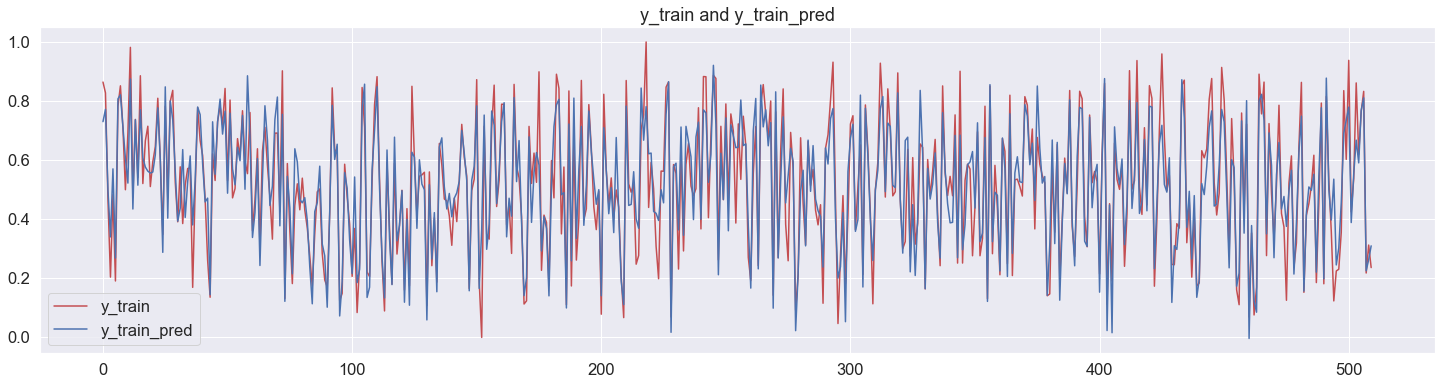

In [56]:
# Checking the y_train and y_train_pred values.
plt.figure(figsize = (25, 6))
c = [i for i in range(0,len(y_train))]
plt.plot(c,y_train,'r',label='y_train')
plt.plot(c,y_train_pred,'b',label='y_train_pred')
plt.title('y_train and y_train_pred')
plt.legend()
plt.show()

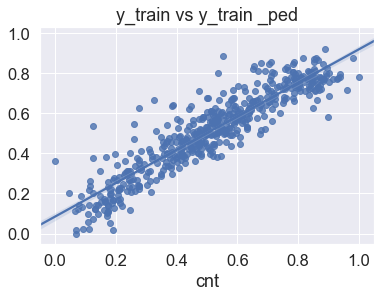

In [57]:
# Regplot of y_train vs y_train _pred
sns.regplot(y_train,y_train_pred)
plt.title('y_train vs y_train _ped')
plt.show()

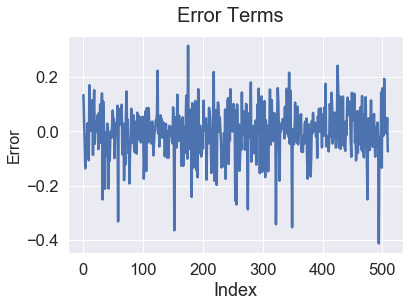

In [58]:
# Error terms
c = [i for i in range(0,len(y_train))]
fig = plt.figure()
plt.plot(c,y_train-y_train_pred, linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error', fontsize=16)                # Y-label
plt.show()

### 2.4. **Model Evalution**

In [59]:
# Rescaling of df_test vars.
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt','lag_cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
# Dividing into X_train and y_train sets
y_test = df_test.pop('cnt')
X_test = df_test

In [61]:
X_test.shape

(219, 30)

In [62]:
# Error value evalution
X_test_lm = sm.add_constant(X_test[features])
y_test_pred = lr3.predict(X_test_lm)

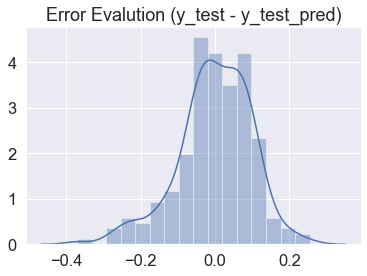

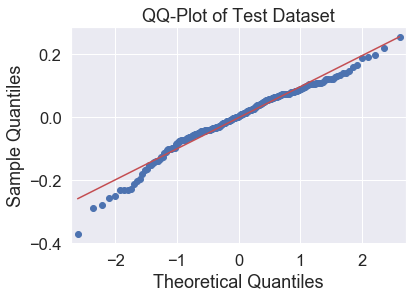

The mean of the residuals is -0.0004264


In [63]:
# Plotting the distplot for errors
sns.distplot(y_test - y_test_pred)
plt.title('Error Evalution (y_test - y_test_pred)')
plt.show()

sm.qqplot(y_test - y_test_pred, line='s')
plt.title('QQ-Plot of Test Dataset')
plt.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(y_test - y_test_pred)/ len(y_train - y_train_pred)
print("The mean of the residuals is {:.4}".format(mean_residuals))

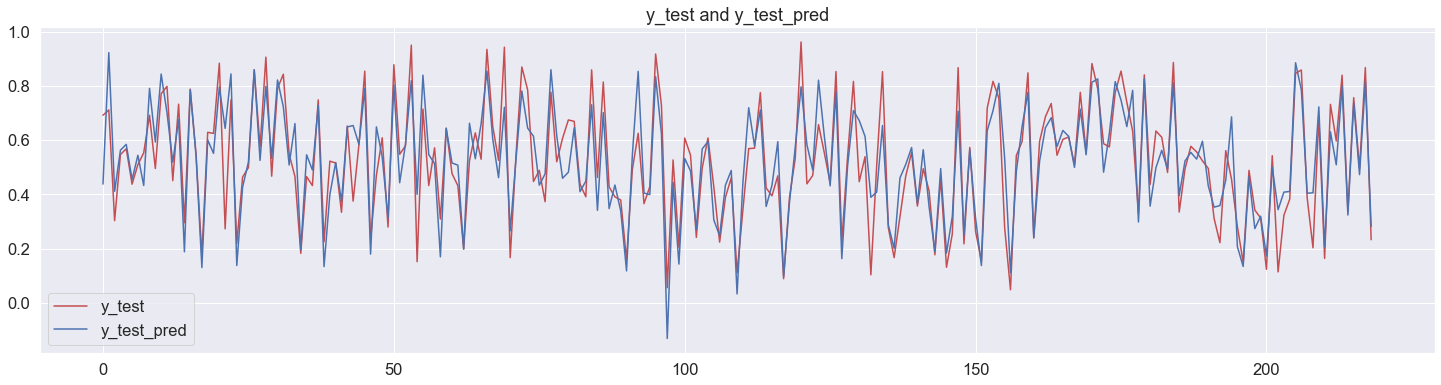

In [64]:
# Checking the y_train and y_train_pred values.
plt.figure(figsize = (25, 6))
c = [i for i in range(0,len(y_test))]
plt.plot(c,y_test,'r',label='y_test')
plt.plot(c,y_test_pred,'b',label='y_test_pred')
plt.title('y_test and y_test_pred')
plt.legend()
plt.show()

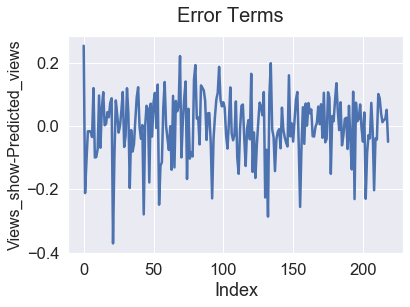

In [65]:
# Error terms
c = [i for i in range(0,len(y_test))]
fig = plt.figure()
plt.plot(c,y_test-y_test_pred, linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label
plt.show()

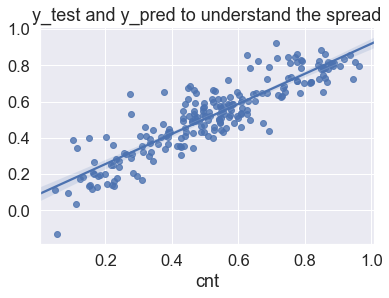

In [66]:
# # Plotting y_test and y_pred to understand the spread
sns.regplot(y_test,y_test_pred)
plt.title('y_test and y_pred to understand the spread')
plt.show()

In [67]:

print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MSE : {}'.format(mean_squared_error(y_test, y_test_pred)))
print('MAE : {}'.format( mean_absolute_error(y_test, y_test_pred)))

RMSE: 0.09853366089213507
MSE : 0.009708882328806269
MAE : 0.07598121689152802


***As we see, the RMSE on train dataset (0.0839) is almost equal to the RMSE of test dataset (0.0841), Hence we can consider that our model is a best fit model***

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7955844377237248

# 3. **Conclusion**

***Best features*** :- *'yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'sept', 'sat', 'Light Rain + Light Snow + Thunderstrom', 'Mist + Cloudy'*

***Best Fit Line*** :- <br>
$ cnt = 0.0753 + 0.2331 \times yr + 0.0563 \times workingday + 0.5499 \times temp - 0.1552 \times windspeed + 0.0874 \times summer + 0.1318 \times winter + 0.0972 \times sept + 0677 \times sat - 0.2880 \times Light Rain,Light Snow,Thunderstrom - 0.0813 \times Mist,Cloudy $

***Adjusted R-Squared on Train Dataset*** : *0.832*<br>
***Adjusted R-Squared on Test Dataset***  : *0.795*

***Top 3 Features using SelectKBest***

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train_lm3, y_train, X_test_lm)
f = pd.DataFrame()
f['feature'] = X_train_lm3.columns
f['score'] = fs.scores_
f.sort_values('score',ascending=False)

,feature,score
3,temp,359.063244
1,yr,273.396320
4,windspeed,34.973644
9,Light Rain + Light Snow + Thunderstrom,27.496015
7,sept,21.460309
10,Mist + Cloudy,16.149378
5,summer,9.336863
2,workingday,4.366865
6,winter,0.541654
8,sat,0.133600


# **Thank You.**